---
---

# **`CASE STUDY - 2` :: Apple Foliar Disease Detection**  🍎🌳🍏
![img_1](E:\STUDY\PROJECTS\AAIC_Case_Study_2\Blog_and_Doc_Images\Apple_img_2.png)


---
---


## **`PROJECT Documents` 💼**
#### ✅ **`Business Deck`**
- This deck is created for explaining the argicultural aspects, open issues, farmers concerns, economic loss and other aspects related to this problem. [🏷️](https://docs.google.com/presentation/d/1mk-jUTnGU4U-fDGsECNzRqugVOIiTmjjbnlrbkxAzuE/)

## **`DATASETS Used` 🍃**
- Plant Pathology 2020 - FGVC7 [🏷️](https://www.kaggle.com/competitions/plant-pathology-2020-fgvc7/overview)

## **`NOTEBOOK Description` 📗**

**This notebook contains the below components:**
    
- Hyper-parameterization of the best performing model (DenseNet-121):
    - Effect of various Optimizers

## **`NOTEBOOK Contents` ✍️**

[1. Libraries Import](#Import_Libraries)

### ⭐ **`Best Performing Model - Optimizers Hyper Parameterization`**

- ⚙️ [Data Preparation](#Data_Preparation)

- ⚙️ [Calculating Class Weights](#Calculating_Class_Weights)

- 💡 [Defining Performance Metrics](#Defining_Performance_Metrics)

- 🧮 [Models Training Configuration](#Models_Training_Configuration)

- ⚗️[Optimizer Hyper Parameterization](#Optimizer_Hyper_Parameterization)
    - [1. DenseNet - 121 - SGD](#A1.DenseNet---121---SGD)
    - [2. DenseNet - 121 - Rectified Adam](#A2.DenseNet---121---RAdam)
    - [3. DenseNet - 121 - NovoGrad](#A3.DenseNet---121---NovoGrad)


- [OVERALL RESULTS](#OVERALL_RESULTS)

## **`Import_Libraries`**

In [6]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 15.6 MB/s 


In [1]:
import os
import sys
import math
import scipy as scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import plotly.express as px
import plotly.graph_objects as go
import hashlib
from IPython.display import display
from sklearn.utils import class_weight
from PIL import Image
from tqdm import tqdm
tqdm.pandas()

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 30)
label_font_dict = {'family':'sans-serif','size':13.5,'color':'brown','style':'italic'}
ticks_font_dict = {'family':'sans-serif','size':11,'color':'black','style':'italic'}
title_font_dict = {'family':'sans-serif','size':17.5,'color':'Blue','style':'italic'}

## **`Data_Preparation`**

In [3]:
import random as rn
import datetime
import time
import pathlib
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, Activation, Flatten, Conv1D, Conv2D, Concatenate, Lambda
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import MaxPool1D, MaxPool2D, GlobalAveragePooling1D, GlobalAveragePooling2D, AveragePooling1D, AveragePooling2D, SpatialDropout2D
from keras.regularizers import l1, l2
from keras.preprocessing import image
from keras.callbacks import Callback
from keras.callbacks import TensorBoard
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, confusion_matrix
from tensorboard import notebook
from sklearn.model_selection import train_test_split

In [4]:
# Downloading the X_train, y_train, X_val, y_val, X_test, y_test files
!gdown 1-0u3ptDTaldA1VhN-RolsS4NCDbFOUES
!gdown 1-3Ex9EW35XQ9ImO_-dZtoMezumtlZlG1
!gdown 1-5-COzsDSvvlaYiXOVbqFD3FknDXpT3I
!gdown 1-5Upw5HC1kdmiuQ-4jP_vY8sJ-lelmHi
!gdown 1_2-6Jiu_GzC0H_3CWmAoBVyzZygT-JzM
!gdown 1dsigc8-o36jGW_2UGGPyLr2_JRUDG-xB

Downloading...
From: https://drive.google.com/uc?id=1-0u3ptDTaldA1VhN-RolsS4NCDbFOUES
To: /content/X_val.npz
100% 1.18G/1.18G [00:07<00:00, 153MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-3Ex9EW35XQ9ImO_-dZtoMezumtlZlG1
To: /content/y_val.npz
100% 31.7k/31.7k [00:00<00:00, 43.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-5-COzsDSvvlaYiXOVbqFD3FknDXpT3I
To: /content/X_test.npz
100% 440M/440M [00:02<00:00, 180MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-5Upw5HC1kdmiuQ-4jP_vY8sJ-lelmHi
To: /content/y_test.npz
100% 6.10k/6.10k [00:00<00:00, 10.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_2-6Jiu_GzC0H_3CWmAoBVyzZygT-JzM
To: /content/X_train.npz
100% 6.71G/6.71G [00:32<00:00, 206MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dsigc8-o36jGW_2UGGPyLr2_JRUDG-xB
To: /content/y_train.npz
100% 178k/178k [00:00<00:00, 71.8MB/s]


In [5]:
# Loading the X_train, y_train, X_val, y_val, X_test & y_test files in memory
x_train_file = np.load("X_train.npz")
X_train = x_train_file.f.arr_0

y_train_file = np.load("y_train.npz")
y_train = y_train_file.f.arr_0

x_val_file = np.load("X_val.npz")
X_val = x_val_file.f.arr_0

y_val_file = np.load("y_val.npz")
y_val = y_val_file.f.arr_0

x_test_file = np.load("X_test.npz")
X_test = x_test_file.f.arr_0

y_test_file = np.load("y_test.npz")
y_test = y_test_file.f.arr_0

In [6]:
# Saving the memory;
del x_train_file;
del y_train_file;
del x_val_file;
del y_val_file;
del x_test_file;
del y_test_file;

In [7]:
# Checking types of TRAIN, VAL & TEST sets
type(X_train), type(y_train), type(X_val), type(y_val), type(X_test), type(y_test)

(numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray)

In [8]:
# Checking shapes of TRAIN, VAL & TEST sets
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((11138, 224, 224, 3),
 (11138, 4),
 (1966, 224, 224, 3),
 (1966, 4),
 (365, 224, 224, 3),
 (365, 4))

## **`Calculating_Class_Weights`**
- **Using the class weights we will be able to solve the problem of class-imbalance.**

In [9]:
y_train.shape

(11138, 4)

In [10]:
cols = ['Healthy', 'Multiple_Diseases', 'Rust', 'Scab']
tmp_cw = pd.DataFrame(y_train, columns=cols)
tmp_cw

,Healthy,Multiple_Diseases,Rust,Scab
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
11133,1.0,0.0,0.0,0.0
11134,1.0,0.0,0.0,0.0
11135,1.0,0.0,0.0,0.0
11136,0.0,0.0,0.0,1.0


In [11]:
def class_label(hl, md, rs, sc):
  """
  Description : This function is created for assigning the class label tag.
  """
  if hl == 1:
    return 0
  elif md == 1:
    return 1
  elif rs == 1:
    return 2
  elif sc == 1:
    return 3

In [12]:
tmp_cw['label'] = tmp_cw[['Healthy', 'Multiple_Diseases', 'Rust', 'Scab']].apply(lambda row: class_label(row['Healthy'], 
                                                                                                   row['Multiple_Diseases'],
                                                                                                   row['Rust'],
                                                                                                   row['Scab']), axis=1)

In [13]:
np.unique(tmp_cw['label'].values)

array([0, 1, 2, 3])

In [14]:
# Calculating the class weights
cw1 = class_weight.compute_class_weight('balanced', classes = np.unique(tmp_cw['label'].values), y=tmp_cw['label'].values)
cw1

array([0.88621897, 4.95462633, 0.72816423, 0.77132964])

In [15]:
# Storing the weights as a dict
cw1_dict = {0:cw1[0], 1:cw1[1], 2:cw1[2], 3:cw1[3]}
cw1_dict

{0: 0.8862189688096753,
 1: 4.954626334519573,
 2: 0.7281642259414226,
 3: 0.7713296398891967}

## **`Defining_Performance_Metrics`**

In [16]:
# Declaring the metrics
tfa_f1_scr = tfa.metrics.F1Score(num_classes=4, average='macro')

In [17]:
# Defining the AUC Score method
def auc_score(y_true, y_pred):
    """
    Description : This function is created for returning ROC AUC Score.
    """
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)

# Calculating the AUC score
def auc(y_true, y_pred):
    """
    Description : This function is created for defining the ROC AUC function as a TF function for graph computation.
    """
    score = tf.py_function(auc_score, [y_true, y_pred], 'float32', name='sklearnAUC')
    return score

In [18]:
cols = ['Healthy', 'Multiple_Diseases', 'Rust', 'Scab'];

In [19]:
# Generating the multi-class confusion matrix for seeing the classification results
def confusion_matrix_(actual_labels, dataset, model, BATCH_SIZE=32):
    """
    Description : This function is created for generating the confusion matrix for all the tgt classes.
    """
    # Model predictions
    y_pred = model.predict(dataset, batch_size=BATCH_SIZE)
  
    # Storing the predictions in the form of 0 or 1
    for i in range(y_pred.shape[0]):
        y_pred[i] = np.where(y_pred[i] == y_pred[i].max(), 1, 0)

    # Storing the actual labels for all tgt classes
    actual_healthy = np.choose([0], actual_labels.T)
    actual_multiple_diseases = np.choose([1], actual_labels.T)
    actual_rust = np.choose([2], actual_labels.T)
    actual_scab = np.choose([3], actual_labels.T)
  
    # Storing the predicted labels for all tgt classes
    predicted_healthy = np.choose([0], y_pred.T)
    predicted_multiple_diseases = np.choose([1], y_pred.T)
    predicted_rust = np.choose([2], y_pred.T)
    predicted_scab = np.choose([3], y_pred.T)
    
    # Generating the perf metrics score
    ## Accuracy
    calc_acc = tf.keras.metrics.BinaryAccuracy()
    calc_acc.update_state(actual_healthy, predicted_healthy)
    acc_healthy = calc_acc.result().numpy()

    calc_acc.update_state(actual_multiple_diseases, predicted_multiple_diseases)
    acc_md = calc_acc.result().numpy()

    calc_acc.update_state(actual_rust, predicted_rust)
    acc_rust = calc_acc.result().numpy()

    calc_acc.update_state(actual_scab, predicted_scab)
    acc_scab = calc_acc.result().numpy()

    acc_df = pd.DataFrame(np.array([acc_healthy, acc_md, acc_rust, acc_scab])).T
    acc_df.columns = cols
    acc_df.index = ["BINARY Accuracy"]

    ## Precision
    calc_prec = tf.keras.metrics.Precision()
    calc_prec.update_state(actual_healthy, predicted_healthy)
    prec_healthy = calc_prec.result().numpy()

    calc_prec.update_state(actual_multiple_diseases, predicted_multiple_diseases)
    prec_md = calc_prec.result().numpy()

    calc_prec.update_state(actual_rust, predicted_rust)
    prec_rust = calc_prec.result().numpy()

    calc_prec.update_state(actual_scab, predicted_scab)
    prec_scab = calc_prec.result().numpy()

    prec_df = pd.DataFrame(np.array([prec_healthy, prec_md, prec_rust, prec_scab])).T
    prec_df.columns = cols
    prec_df.index = ["Precision"]

    ## Recall
    calc_rec = tf.keras.metrics.Recall()
    calc_rec.update_state(actual_healthy, predicted_healthy)
    rec_healthy = calc_rec.result().numpy()

    calc_rec.update_state(actual_multiple_diseases, predicted_multiple_diseases)
    rec_md = calc_rec.result().numpy()

    calc_rec.update_state(actual_rust, predicted_rust)
    rec_rust = calc_rec.result().numpy()

    calc_rec.update_state(actual_scab, predicted_scab)
    rec_scab = calc_rec.result().numpy()

    rec_df = pd.DataFrame(np.array([rec_healthy, rec_md, rec_rust, rec_scab])).T
    rec_df.columns = cols
    rec_df.index = ["Recall"]

    ## F1 Score
    f1_scr_hl = f1_score(actual_healthy, predicted_healthy, average='macro')
    f1_scr_md = f1_score(actual_multiple_diseases, predicted_multiple_diseases, average='macro')
    f1_scr_rs = f1_score(actual_rust, predicted_rust, average='macro')
    f1_scr_sc = f1_score(actual_scab, predicted_scab, average='macro')

    f1_scr_df = pd.DataFrame(np.array([f1_scr_hl, f1_scr_md, f1_scr_rs, f1_scr_sc])).T
    f1_scr_df.columns = cols
    f1_scr_df.index = ["Macro F1 Score"]

    ## ROC AUC Score
    roc_auc_scr_hl = roc_auc_score(actual_healthy, predicted_healthy, average='macro')
    roc_auc_scr_md = roc_auc_score(actual_multiple_diseases, predicted_multiple_diseases, average='macro')
    roc_auc_scr_rs = roc_auc_score(actual_rust, predicted_rust, average='macro')
    roc_auc_scr_sc = roc_auc_score(actual_scab, predicted_scab, average='macro')

    roc_auc_scr_df = pd.DataFrame(np.array([roc_auc_scr_hl, roc_auc_scr_md, roc_auc_scr_rs, roc_auc_scr_sc])).T
    roc_auc_scr_df.columns = cols
    roc_auc_scr_df.index = ["Macro ROC AUC Score"]

    ## Final Results
    results_df = pd.concat([acc_df, prec_df, rec_df, f1_scr_df, roc_auc_scr_df], axis=0)
    results_df = results_df.applymap(lambda val: np.round(val,4))
    
    # Plotting the confusion matrix
    with plt.style.context('seaborn-poster'):
        fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,14), sharex=False, sharey=False)
        # CM for healthy class
        cm1 = confusion_matrix(actual_healthy, predicted_healthy,labels=[0,1])
        sns.heatmap(cm1, annot=True, cmap="plasma", fmt=".3f", xticklabels = ['Not Healthy','Healthy'], yticklabels = ['Not Healthy','Healthy'], cbar=False, ax=ax[0,0])
        ax[0,0].set_xlabel('Predicted', fontdict=label_font_dict)
        ax[0,0].set_ylabel('Actual', fontdict=label_font_dict)
        ax0_xticks = ax[0,0].get_yticklabels()
        ax0_yticks = ax[0,0].get_yticklabels()
        ax[0,0].set_xticklabels(labels = ax0_xticks, fontdict=ticks_font_dict)
        ax[0,0].set_yticklabels(labels = ax0_xticks, fontdict=ticks_font_dict)
        ax[0,0].set_title("Healthy", fontdict=title_font_dict)

        # CM for mutiple diseases class
        cm2 = confusion_matrix(actual_multiple_diseases, predicted_multiple_diseases,labels=[0,1])
        sns.heatmap(cm2, annot=True, cmap="plasma", fmt=".3f", xticklabels = ['No M.D','M.D'], yticklabels = ['No M.D','M.D'], cbar=False, ax=ax[0,1])
        ax[0,1].set_xlabel('Predicted', fontdict=label_font_dict)
        ax[0,1].set_ylabel('Actual', fontdict=label_font_dict)
        ax1_xticks = ax[0,1].get_yticklabels()
        ax1_yticks = ax[0,1].get_yticklabels()
        ax[0,1].set_xticklabels(labels = ax1_xticks, fontdict=ticks_font_dict)
        ax[0,1].set_yticklabels(labels = ax1_xticks, fontdict=ticks_font_dict)
        ax[0,1].set_title("Multiple Diseases", fontdict=title_font_dict)

        # CM for rust class
        cm3 = confusion_matrix(actual_rust, predicted_rust,labels=[0,1])
        sns.heatmap(cm3, annot=True, cmap="plasma", fmt=".3f", xticklabels = ['No Rust','Rust'], yticklabels = ['No Rust','Rust'], cbar=False, ax=ax[1,0])
        ax[1,0].set_xlabel('Predicted', fontdict=label_font_dict)
        ax[1,0].set_ylabel('Actual', fontdict=label_font_dict)
        ax2_xticks = ax[1,0].get_yticklabels()
        ax2_yticks = ax[1,0].get_yticklabels()
        ax[1,0].set_xticklabels(labels = ax2_xticks, fontdict=ticks_font_dict)
        ax[1,0].set_yticklabels(labels = ax2_xticks, fontdict=ticks_font_dict)
        ax[1,0].set_title("Rust", fontdict=title_font_dict)

        # CM for scab class
        cm4 = confusion_matrix(actual_scab, predicted_scab,labels=[0,1])
        sns.heatmap(cm4, annot=True, cmap="plasma", fmt=".3f", xticklabels = ['No Scab','Scab'], yticklabels = ['No Scab','Scab'], cbar=False, ax=ax[1,1])
        ax[1,1].set_xlabel('Predicted', fontdict=label_font_dict)
        ax[1,1].set_ylabel('Actual', fontdict=label_font_dict)
        ax3_xticks = ax[1,1].get_yticklabels()
        ax3_yticks = ax[1,1].get_yticklabels()
        ax[1,1].set_xticklabels(labels = ax3_xticks, fontdict=ticks_font_dict)
        ax[1,1].set_yticklabels(labels = ax3_xticks, fontdict=ticks_font_dict)
        ax[1,1].set_title("Scab", fontdict=title_font_dict)
        plt.show()
        
        return results_df

In [20]:
# Loading the tensorboard
%load_ext tensorboard

# Folder storing all the runs logs
root_logdir = os.path.join(os.path.join(os.curdir, "logs"), "fit")

# Get current run logs directory
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

## **`Models_Training_Configuration`**

In [21]:
# Defining the batch-size
BATCH_SIZE = 32

# Using the AUTOTUNE algo for better allocation of computing resources for Dataset pipeline
AUTO = tf.data.experimental.AUTOTUNE

In [22]:
tf.autograph.experimental.do_not_convert(func=None)

<function tensorflow.python.autograph.impl.api.do_not_convert(func=None)>

In [23]:
# Size of TRAIN & VALIDATION labels and BATCH SIZE
y_train.shape[0], BATCH_SIZE, y_val.shape[0]

(11138, 32, 1966)

In [24]:
# Calculating train steps
train_steps = y_train.shape[0] // BATCH_SIZE
train_steps

348

In [25]:
# Calculating test steps
valid_steps = y_val.shape[0] // BATCH_SIZE
valid_steps

61

In [26]:
# Printing class weights
cw1_dict

{0: 0.8862189688096753,
 1: 4.954626334519573,
 2: 0.7281642259414226,
 3: 0.7713296398891967}

## **`Optimizer_Hyper_Parameterization`**
#### **Global_Tuning---Custom_TopLayers---ImageNet_Weights**

#### **`Effect_of_various_Optimizers`**

In [27]:
# global learning rate
global_learning_rate= 0.0001

### **`A1.DenseNet---121---SGD`**

In [32]:
# build the DenseNet - 121 network
densenet_121_opt1 = tf.keras.applications.DenseNet121(include_top=False, weights='imagenet', input_shape=(224,224,3))

# Instantiating SGD Optimizer
opt1 = tf.keras.optimizers.SGD(learning_rate=global_learning_rate)

# Reduce Learning Rate on Plateau
reduce_lr1 = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, mode='auto', min_delta=0.0001)

# Logs directory
curr_run_logdir1 = get_run_logdir()

# Instantiating Tensorboard callback
tensorboard_callback1 = TensorBoard(log_dir=curr_run_logdir1, histogram_freq=1)

29084464/29084464 [==============================] - 1s 0us/step


In [33]:
# Setting the seed
os.environ['PYTHONHASHSEED'] = '0'

# Clearing the TF session
tf.keras.backend.clear_session()

# defining the custom top of the DenseNet-121 model
for layer in densenet_121_opt1.layers:
    layer.trainable = True

# Adding additional layers
input_layer = densenet_121_opt1.output
    
# Defining the top layers structure of the model
flatten = tf.keras.layers.GlobalAveragePooling2D(name='Flatten_for_hidden_layers')(input_layer)

dropout_1 = Dropout(rate=0.5, name='Dropout1')(flatten)

dense_layer1 = tf.keras.layers.Dense(units=128, 
                                     activation='relu', 
                                     use_bias=True, 
                                     kernel_initializer=tf.keras.initializers.he_normal(seed=80),
                                     bias_initializer=tf.keras.initializers.he_normal(seed=110),
                                     name='Hidden_Layer1')(dropout_1)

dropout_2 = Dropout(rate=0.5, name='Dropout2')(dense_layer1)

dense_layer2 = tf.keras.layers.Dense(units=128, 
                                     activation='relu', 
                                     use_bias=True, 
                                     kernel_initializer=tf.keras.initializers.he_normal(seed=80),
                                     bias_initializer=tf.keras.initializers.he_normal(seed=110),
                                     name='Hidden_Layer2')(dropout_2)

dropout_3 = Dropout(rate=0.5, name='Dropout3')(dense_layer2)

dense_layer3 = tf.keras.layers.Dense(units=128, 
                                     activation='relu', 
                                     use_bias=True, 
                                     kernel_initializer=tf.keras.initializers.he_normal(seed=80),
                                     bias_initializer=tf.keras.initializers.he_normal(seed=110),
                                     name='Hidden_Layer3')(dropout_3)

output_layer = tf.keras.layers.Dense(4, activation='softmax', name="output")(dense_layer3)

# Instantiating the complete model
densenet_opt1 = Model(inputs=densenet_121_opt1.input, outputs=output_layer)

# Compiling the model
densenet_opt1.compile(optimizer=opt1,
                  loss = 'categorical_crossentropy',
                  metrics=['categorical_accuracy', tfa_f1_scr])

# Summary of the DenseNet - 121 with custom top
densenet_opt1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [34]:
# Training the DenseNet - 121 (OPT - 1) model having custom top
history1 = densenet_opt1.fit(X_train, y_train,
                            epochs=16,
                            batch_size=BATCH_SIZE,
                            callbacks=[tensorboard_callback1, reduce_lr1],
                            steps_per_epoch=train_steps,
                            validation_steps=valid_steps,
                            validation_data=[X_val, y_val],
                            class_weight=cw1_dict,
                            verbose=1)

Epoch 1/16
348/348 [==============================] - 156s 384ms/step - loss: 2.8917 - categorical_accuracy: 0.2452 - f1_score: 0.2148 - val_loss: 1.4213 - val_categorical_accuracy: 0.2736 - val_f1_score: 0.2707 - lr: 1.0000e-04
Epoch 2/16
348/348 [==============================] - 134s 379ms/step - loss: 2.3277 - categorical_accuracy: 0.2609 - f1_score: 0.2399 - val_loss: 1.3245 - val_categorical_accuracy: 0.3781 - val_f1_score: 0.3082 - lr: 1.0000e-04
Epoch 3/16
348/348 [==============================] - 131s 378ms/step - loss: 2.0910 - categorical_accuracy: 0.2710 - f1_score: 0.2490 - val_loss: 1.2956 - val_categorical_accuracy: 0.4134 - val_f1_score: 0.3566 - lr: 1.0000e-04
Epoch 4/16
348/348 [==============================] - 131s 377ms/step - loss: 1.9323 - categorical_accuracy: 0.2874 - f1_score: 0.2618 - val_loss: 1.3276 - val_categorical_accuracy: 0.3463 - val_f1_score: 0.2862 - lr: 1.0000e-04
Epoch 5/16
348/348 [==============================] - 131s 378ms/step - loss: 1.8518

#### **Evaluation on VALIDATION Set**


::::    Validation Set    ====>    PREDICTION Confusion Matrix    ::::

62/62 [==============================] - 8s 110ms/step


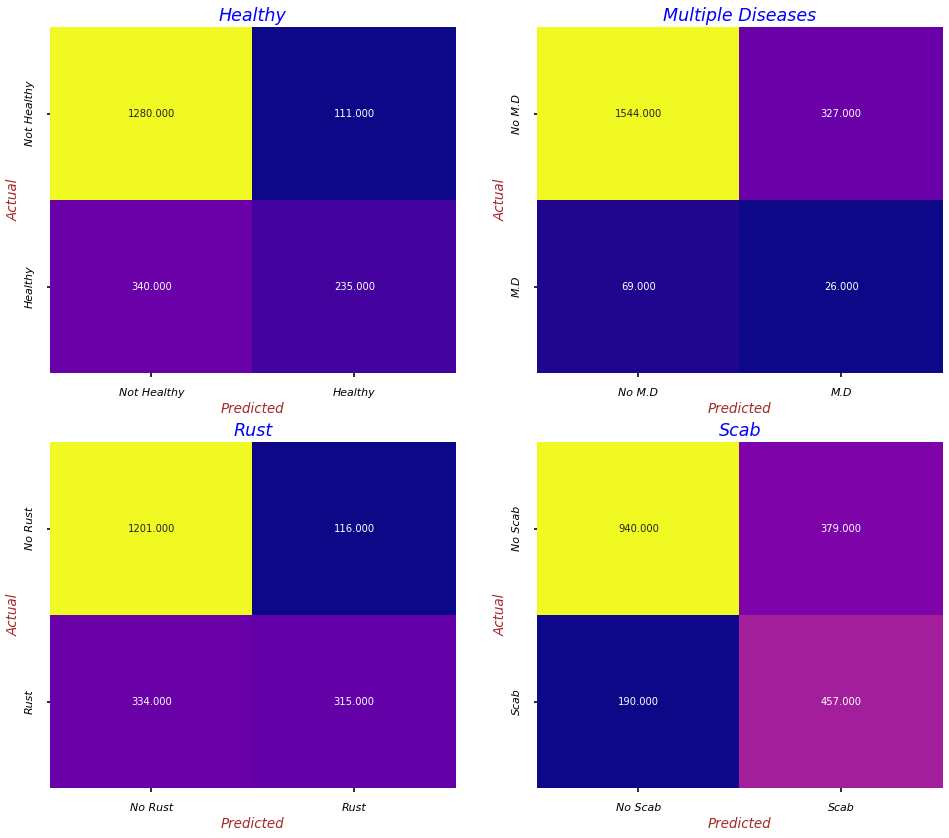


::::    Validation Set    ====>    FINAL Results    ::::



,Healthy,Multiple_Diseases,Rust,Scab
BINARY Accuracy,0.7706,0.7846,0.7801,0.7627
Precision,0.6792,0.3734,0.5097,0.5254
Recall,0.4087,0.3896,0.4367,0.5254
Macro F1 Score,0.6803,0.5012,0.7128,0.6920
Macro ROC AUC Score,0.6644,0.5495,0.6986,0.7095


In [35]:
# Plotting the Final Results on Validation Set
print("\n::::    Validation Set    ====>    PREDICTION Confusion Matrix    ::::\n")
densenet_opt1_global_tuning_val_results = confusion_matrix_(y_val, X_val, densenet_opt1)

# Displaying the overall performance results
print("\n::::    Validation Set    ====>    FINAL Results    ::::\n")
display(densenet_opt1_global_tuning_val_results)

**`OBSERVATIONS`**

- So, it is pretty much evident that with SGD optimizer we haven't reached the par score in the same number of epochs.

#### **Evaluation on TEST Set**


::::    TEST Set    ====>    PREDICTION Confusion Matrix    ::::

12/12 [==============================] - 2s 193ms/step


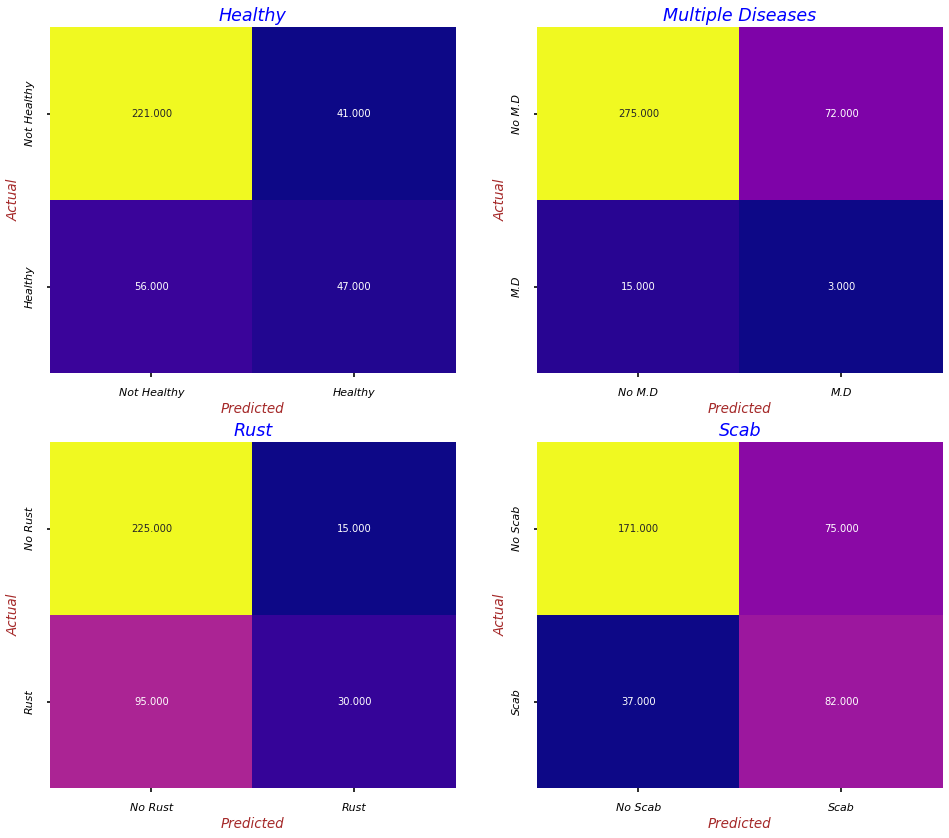


::::    TEST Set    ====>    FINAL Results    ::::



,Healthy,Multiple_Diseases,Rust,Scab
BINARY Accuracy,0.7342,0.7479,0.7315,0.7219
Precision,0.5341,0.3067,0.3846,0.4438
Recall,0.4563,0.4132,0.3252,0.4438
Macro F1 Score,0.6561,0.4640,0.5783,0.6738
Macro ROC AUC Score,0.6499,0.4796,0.5888,0.6921


In [36]:
# Plotting the Results on TEST Set
print("\n::::    TEST Set    ====>    PREDICTION Confusion Matrix    ::::\n")
densenet_opt1_global_tuning_test_results = confusion_matrix_(y_test, X_test, densenet_opt1)

# Displaying the overall performance results
print("\n::::    TEST Set    ====>    FINAL Results    ::::\n")
display(densenet_opt1_global_tuning_test_results)

**`OBSERVATIONS`**

- So, it is pretty much evident that with SGD optimizer we haven't reached the par score in the same number of epochs.
    - For the `Multiple_Diseases` class the results are infact below par.

### **`A2.DenseNet---121---RAdam`**

In [27]:
# build the DenseNet - 121 network
densenet_121_opt2 = tf.keras.applications.DenseNet121(include_top=False, weights='imagenet', input_shape=(224,224,3))

# Instantiating SGD Optimizer
opt2 = tfa.optimizers.RectifiedAdam(learning_rate=global_learning_rate)

# Reduce Learning Rate on Plateau
reduce_lr2 = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, mode='auto', min_delta=0.0001)

# Logs directory
curr_run_logdir2 = get_run_logdir()

# Instantiating Tensorboard callback
tensorboard_callback2 = TensorBoard(log_dir=curr_run_logdir2, histogram_freq=1)

In [28]:
# Setting the seed
os.environ['PYTHONHASHSEED'] = '0'

# Clearing the TF session
tf.keras.backend.clear_session()

# defining the custom top of the DenseNet-121 model
for layer in densenet_121_opt2.layers:
    layer.trainable = True

# Adding additional layers
input_layer = densenet_121_opt2.output
    
# Defining the top layers structure of the model
flatten = tf.keras.layers.GlobalAveragePooling2D(name='Flatten_for_hidden_layers')(input_layer)

dropout_1 = Dropout(rate=0.5, name='Dropout1')(flatten)

dense_layer1 = tf.keras.layers.Dense(units=128, 
                                     activation='relu', 
                                     use_bias=True, 
                                     kernel_initializer=tf.keras.initializers.he_normal(seed=80),
                                     bias_initializer=tf.keras.initializers.he_normal(seed=110),
                                     name='Hidden_Layer1')(dropout_1)

dropout_2 = Dropout(rate=0.5, name='Dropout2')(dense_layer1)

dense_layer2 = tf.keras.layers.Dense(units=128, 
                                     activation='relu', 
                                     use_bias=True, 
                                     kernel_initializer=tf.keras.initializers.he_normal(seed=80),
                                     bias_initializer=tf.keras.initializers.he_normal(seed=110),
                                     name='Hidden_Layer2')(dropout_2)

dropout_3 = Dropout(rate=0.5, name='Dropout3')(dense_layer2)

dense_layer3 = tf.keras.layers.Dense(units=128, 
                                     activation='relu', 
                                     use_bias=True, 
                                     kernel_initializer=tf.keras.initializers.he_normal(seed=80),
                                     bias_initializer=tf.keras.initializers.he_normal(seed=110),
                                     name='Hidden_Layer3')(dropout_3)

output_layer = tf.keras.layers.Dense(4, activation='softmax', name="output")(dense_layer3)

# Instantiating the complete model
densenet_opt2 = Model(inputs=densenet_121_opt2.input, outputs=output_layer)

# Compiling the model
densenet_opt2.compile(optimizer=opt2,
                  loss = 'categorical_crossentropy',
                  metrics=['categorical_accuracy', tfa_f1_scr])

# Summary of the DenseNet - 121 with custom top
densenet_opt2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [29]:
# Training the DenseNet - 121 (OPT - 1) model having custom top
history2 = densenet_opt2.fit(X_train, y_train,
                            epochs=17,
                            batch_size=BATCH_SIZE,
                            callbacks=[tensorboard_callback2, reduce_lr2],
                            steps_per_epoch=train_steps,
                            validation_steps=valid_steps,
                            validation_data=[X_val, y_val],
                            class_weight=cw1_dict,
                            verbose=1)

Epoch 1/17
348/348 [==============================] - 188s 407ms/step - loss: 2.4617 - categorical_accuracy: 0.2545 - f1_score: 0.2399 - val_loss: 1.2390 - val_categorical_accuracy: 0.4590 - val_f1_score: 0.4082 - lr: 1.0000e-04
Epoch 2/17
348/348 [==============================] - 141s 399ms/step - loss: 1.6118 - categorical_accuracy: 0.3557 - f1_score: 0.3239 - val_loss: 0.8310 - val_categorical_accuracy: 0.7910 - val_f1_score: 0.7044 - lr: 1.0000e-04
Epoch 3/17
348/348 [==============================] - 138s 398ms/step - loss: 1.0241 - categorical_accuracy: 0.6029 - f1_score: 0.5402 - val_loss: 0.3189 - val_categorical_accuracy: 0.9027 - val_f1_score: 0.8256 - lr: 1.0000e-04
Epoch 4/17
348/348 [==============================] - 138s 398ms/step - loss: 0.5577 - categorical_accuracy: 0.8060 - f1_score: 0.7379 - val_loss: 0.1362 - val_categorical_accuracy: 0.9611 - val_f1_score: 0.9302 - lr: 1.0000e-04
Epoch 5/17
348/348 [==============================] - 138s 398ms/step - loss: 0.3159

#### **Evaluation on VALIDATION Set**


::::    Validation Set    ====>    PREDICTION Confusion Matrix    ::::

62/62 [==============================] - 9s 111ms/step


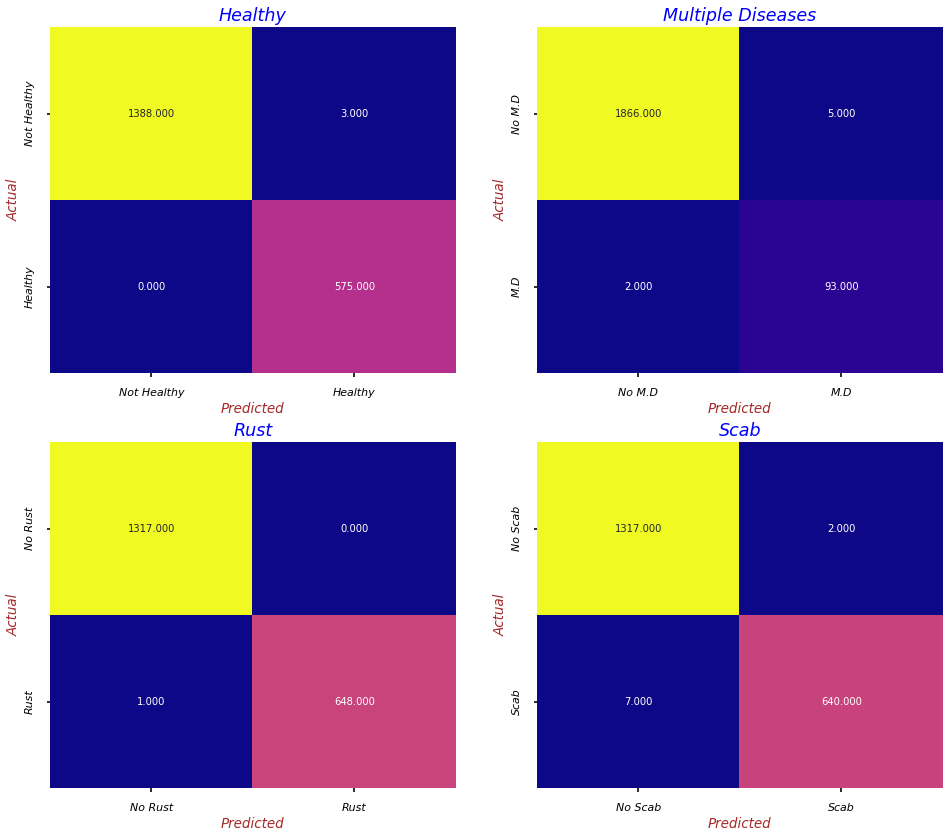


::::    Validation Set    ====>    FINAL Results    ::::



,Healthy,Multiple_Diseases,Rust,Scab
BINARY Accuracy,0.9985,0.9975,0.9981,0.9975
Precision,0.9948,0.9882,0.9940,0.9949
Recall,1.0000,0.9970,0.9977,0.9949
Macro F1 Score,0.9982,0.9809,0.9994,0.9948
Macro ROC AUC Score,0.9989,0.9881,0.9992,0.9938


In [30]:
# Plotting the Final Results on Validation Set
print("\n::::    Validation Set    ====>    PREDICTION Confusion Matrix    ::::\n")
densenet_opt2_global_tuning_val_results = confusion_matrix_(y_val, X_val, densenet_opt2)

# Displaying the overall performance results
print("\n::::    Validation Set    ====>    FINAL Results    ::::\n")
display(densenet_opt2_global_tuning_val_results)

**`OBSERVATIONS`**

- For the training and the validation set model with RAdam optimizer has achieved impressive results as compared to the SGD.

#### **Evaluation on TEST Set**


::::    TEST Set    ====>    PREDICTION Confusion Matrix    ::::

12/12 [==============================] - 2s 196ms/step


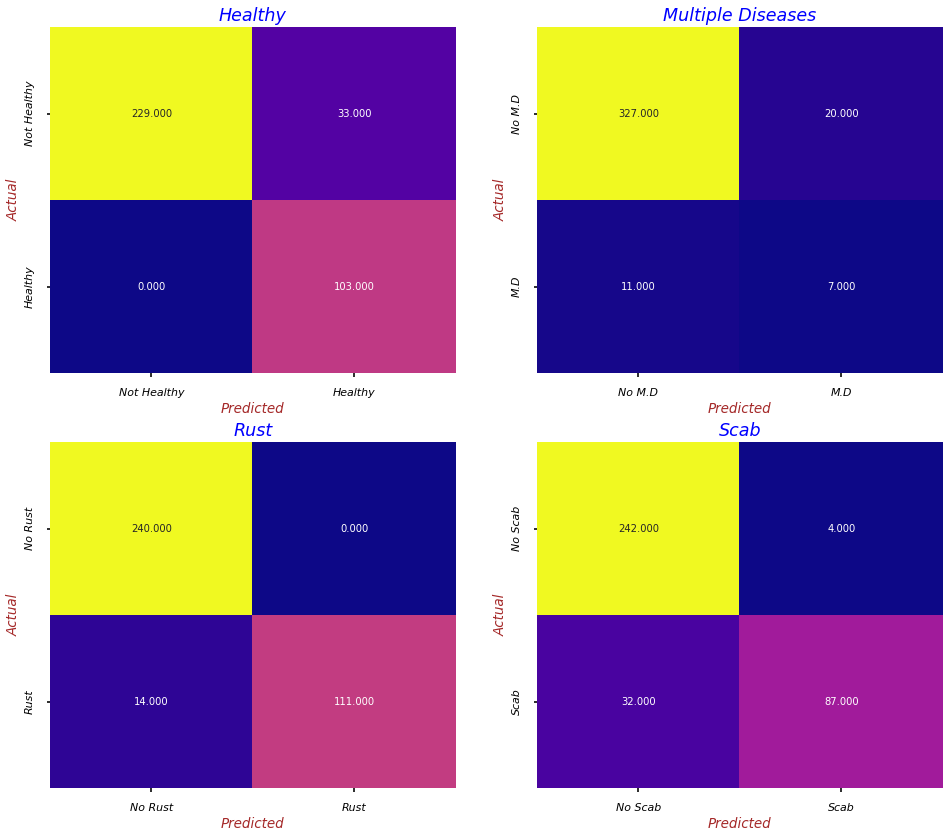


::::    TEST Set    ====>    FINAL Results    ::::



,Healthy,Multiple_Diseases,Rust,Scab
BINARY Accuracy,0.9096,0.9123,0.9288,0.9219
Precision,0.7574,0.6748,0.8066,0.8438
Recall,1.0000,0.9091,0.8984,0.8438
Macro F1 Score,0.8974,0.6329,0.9562,0.8797
Macro ROC AUC Score,0.9370,0.6656,0.9440,0.8574


In [31]:
# Plotting the Results on TEST Set
print("\n::::    TEST Set    ====>    PREDICTION Confusion Matrix    ::::\n")
densenet_opt2_global_tuning_test_results = confusion_matrix_(y_test, X_test, densenet_opt2)

# Displaying the overall performance results
print("\n::::    TEST Set    ====>    FINAL Results    ::::\n")
display(densenet_opt2_global_tuning_test_results)

**`OBSERVATIONS`**

- On the TEST set model is working very well for the `Rusty`, `Scab` and `Healthy` images.
    - However, for the `Multiple diseases` class that has the lowest +ve cases, it is making some false positives and negatives.


- Overall, it is performing better than the ResNet-50 and baseline models but not as good as the best-performing DenseNet - 121 model (Adam).

### **`A3.DenseNet---121---NovoGrad`**

In [28]:
# build the DenseNet - 121 network
densenet_121_opt3 = tf.keras.applications.DenseNet121(include_top=False, weights='imagenet', input_shape=(224,224,3))

# Instantiating SGD Optimizer
opt3 = tfa.optimizers.NovoGrad(learning_rate=global_learning_rate)

# Reduce Learning Rate on Plateau
reduce_lr3 = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, mode='auto', min_delta=0.0001)

# Logs directory
curr_run_logdir3 = get_run_logdir()

# Instantiating Tensorboard callback
tensorboard_callback3 = TensorBoard(log_dir=curr_run_logdir3, histogram_freq=1)

In [29]:
# Setting the seed
os.environ['PYTHONHASHSEED'] = '0'

# Clearing the TF session
tf.keras.backend.clear_session()

# defining the custom top of the DenseNet-121 model
for layer in densenet_121_opt3.layers:
    layer.trainable = True

# Adding additional layers
input_layer = densenet_121_opt3.output
    
# Defining the top layers structure of the model
flatten = tf.keras.layers.GlobalAveragePooling2D(name='Flatten_for_hidden_layers')(input_layer)

dropout_1 = Dropout(rate=0.5, name='Dropout1')(flatten)

dense_layer1 = tf.keras.layers.Dense(units=128, 
                                     activation='relu', 
                                     use_bias=True, 
                                     kernel_initializer=tf.keras.initializers.he_normal(seed=80),
                                     bias_initializer=tf.keras.initializers.he_normal(seed=110),
                                     name='Hidden_Layer1')(dropout_1)

dropout_2 = Dropout(rate=0.5, name='Dropout2')(dense_layer1)

dense_layer2 = tf.keras.layers.Dense(units=128, 
                                     activation='relu', 
                                     use_bias=True, 
                                     kernel_initializer=tf.keras.initializers.he_normal(seed=80),
                                     bias_initializer=tf.keras.initializers.he_normal(seed=110),
                                     name='Hidden_Layer2')(dropout_2)

dropout_3 = Dropout(rate=0.5, name='Dropout3')(dense_layer2)

dense_layer3 = tf.keras.layers.Dense(units=128, 
                                     activation='relu', 
                                     use_bias=True, 
                                     kernel_initializer=tf.keras.initializers.he_normal(seed=80),
                                     bias_initializer=tf.keras.initializers.he_normal(seed=110),
                                     name='Hidden_Layer3')(dropout_3)

output_layer = tf.keras.layers.Dense(4, activation='softmax', name="output")(dense_layer3)

# Instantiating the complete model
densenet_opt3 = Model(inputs=densenet_121_opt3.input, outputs=output_layer)

# Compiling the model
densenet_opt3.compile(optimizer=opt3,
                  loss = 'categorical_crossentropy',
                  metrics=['categorical_accuracy', tfa_f1_scr])

# Summary of the DenseNet - 121 with custom top
densenet_opt3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [30]:
# Training the DenseNet - 121 (OPT - 1) model having custom top
history3 = densenet_opt3.fit(X_train, y_train,
                            epochs=16,
                            batch_size=BATCH_SIZE,
                            callbacks=[tensorboard_callback3, reduce_lr3],
                            steps_per_epoch=train_steps,
                            validation_steps=valid_steps,
                            validation_data=[X_val, y_val],
                            class_weight=cw1_dict,
                            verbose=1)

Epoch 1/16
348/348 [==============================] - 231s 420ms/step - loss: 2.5408 - categorical_accuracy: 0.2659 - f1_score: 0.2421 - val_loss: 1.3038 - val_categorical_accuracy: 0.4088 - val_f1_score: 0.2974 - lr: 1.0000e-04
Epoch 2/16
348/348 [==============================] - 145s 412ms/step - loss: 2.0904 - categorical_accuracy: 0.2934 - f1_score: 0.2686 - val_loss: 1.1894 - val_categorical_accuracy: 0.4964 - val_f1_score: 0.3724 - lr: 1.0000e-04
Epoch 3/16
348/348 [==============================] - 143s 411ms/step - loss: 1.8472 - categorical_accuracy: 0.3150 - f1_score: 0.2880 - val_loss: 1.0706 - val_categorical_accuracy: 0.5799 - val_f1_score: 0.4582 - lr: 1.0000e-04
Epoch 4/16
348/348 [==============================] - 144s 413ms/step - loss: 1.6910 - categorical_accuracy: 0.3567 - f1_score: 0.3227 - val_loss: 0.9779 - val_categorical_accuracy: 0.6368 - val_f1_score: 0.5112 - lr: 1.0000e-04
Epoch 5/16
348/348 [==============================] - 145s 418ms/step - loss: 1.5426

#### **Evaluation on VALIDATION Set**


::::    Validation Set    ====>    PREDICTION Confusion Matrix    ::::

62/62 [==============================] - 8s 100ms/step


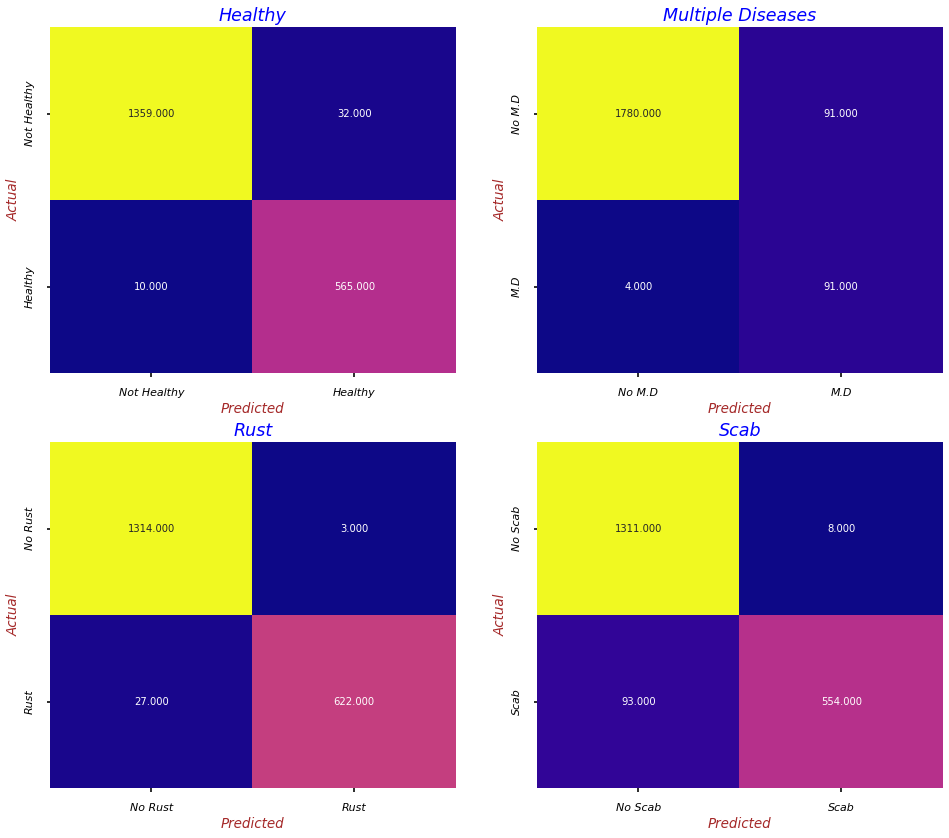


::::    Validation Set    ====>    FINAL Results    ::::



,Healthy,Multiple_Diseases,Rust,Scab
BINARY Accuracy,0.9786,0.9652,0.9717,0.9659
Precision,0.9464,0.8421,0.9103,0.9318
Recall,0.9826,0.9791,0.9689,0.9318
Macro F1 Score,0.9745,0.8155,0.9826,0.9397
Macro ROC AUC Score,0.9798,0.9546,0.9781,0.9251


In [31]:
# Plotting the Final Results on Validation Set
print("\n::::    Validation Set    ====>    PREDICTION Confusion Matrix    ::::\n")
densenet_opt3_global_tuning_val_results = confusion_matrix_(y_val, X_val, densenet_opt3)

# Displaying the overall performance results
print("\n::::    Validation Set    ====>    FINAL Results    ::::\n")
display(densenet_opt3_global_tuning_val_results)

**`OBSERVATIONS`**

- For the training and the validation set model with RAdam optimizer has achieved impressive results as compared to the SGD.

#### **Evaluation on TEST Set**


::::    TEST Set    ====>    PREDICTION Confusion Matrix    ::::

12/12 [==============================] - 2s 173ms/step


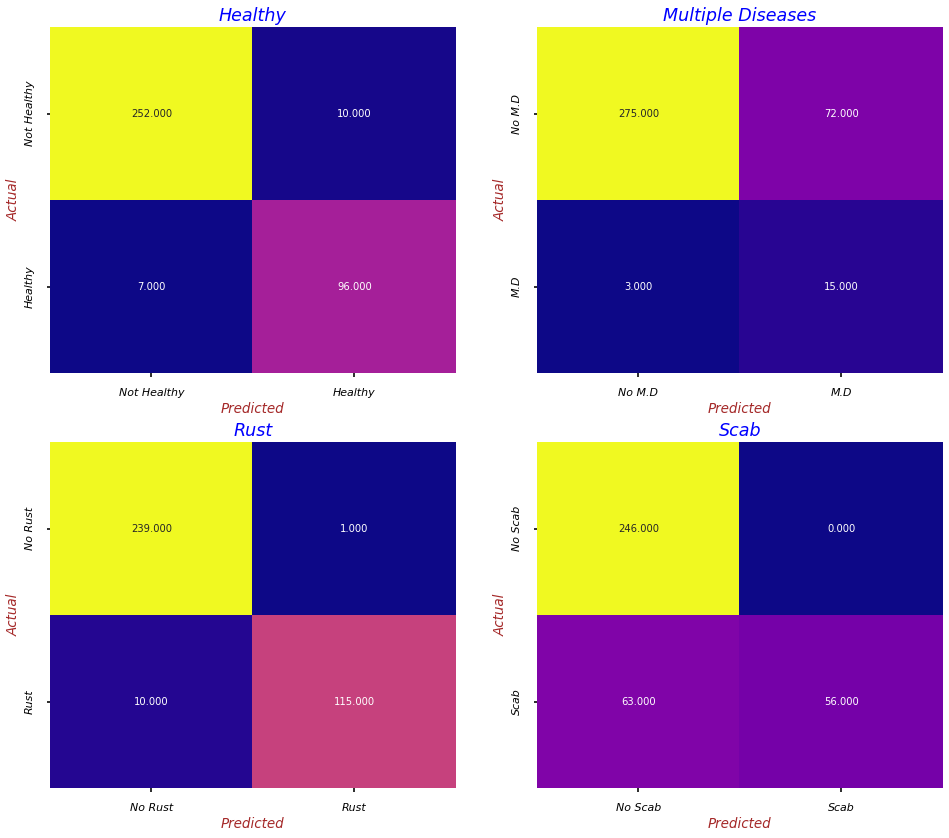


::::    TEST Set    ====>    FINAL Results    ::::



,Healthy,Multiple_Diseases,Rust,Scab
BINARY Accuracy,0.9534,0.8740,0.9059,0.8863
Precision,0.9057,0.5751,0.7314,0.7726
Recall,0.9320,0.9174,0.9187,0.7726
Macro F1 Score,0.9430,0.5829,0.9659,0.7632
Macro ROC AUC Score,0.9469,0.8129,0.9579,0.7353


In [32]:
# Plotting the Results on TEST Set
print("\n::::    TEST Set    ====>    PREDICTION Confusion Matrix    ::::\n")
densenet_opt3_global_tuning_test_results = confusion_matrix_(y_test, X_test, densenet_opt3)

# Displaying the overall performance results
print("\n::::    TEST Set    ====>    FINAL Results    ::::\n")
display(densenet_opt3_global_tuning_test_results)

**`OBSERVATIONS`**

- On the TEST set model is working very well for the `Rusty`, `Scab` and `Healthy` images.
    - However, for the `Multiple diseases` class that has the lowest +ve cases, it is making some false positives and negatives.


- Overall, it is performing better than the ResNet-50 and baseline models but not as good as the best-performing DenseNet - 121 model (Adam).

## **`OVERALL_RESULTS`**

![model_5](E:\STUDY\PROJECTS\AAIC_Case_Study_2\4_CS_2_Optimizer_HParam_Tuning_Results.png)

**`OBSERVATIONS`**

- In the above experimentations, I found that using `Adam` as an optimizer has yielded better overall performance of the model as compared to the other evaluated optimizers.